In [11]:
import pandas as pd

## Merge DataFrames

Two DataFrames might hold different kinds of information about the same entity and linked by some common feature/column. To join these DataFrames, pandas provides multiple functions like concat(), merge() , join(), etc.  

You can join DataFrames df_row (which you created by concatenating df1 and df2 along the row) and df3 on the common column (or key) id. To do so, pass the names of the DataFrames and an additional argument on as the name of the common column, here id, to the merge() function:

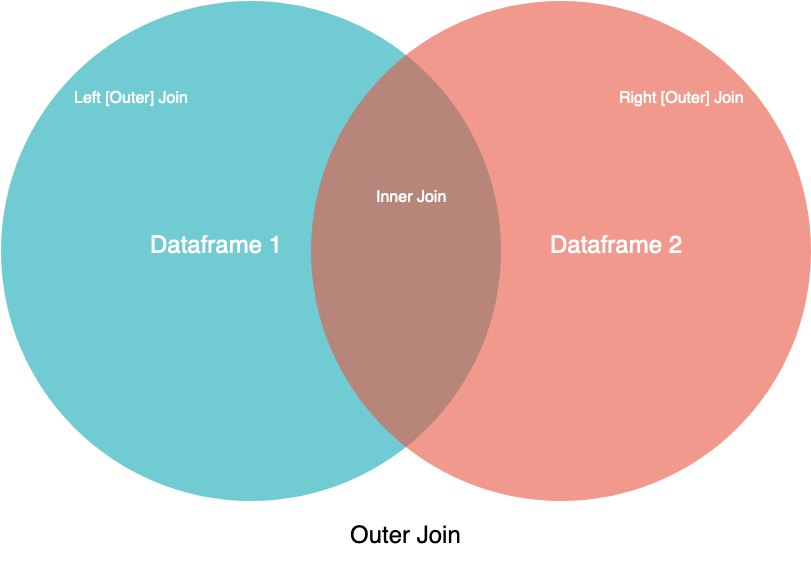

## Join DataFrames

Full Outer Join   


The FULL OUTER JOIN combines the results of both the left and the right outer joins. The joined DataFrame will contain all records from both the DataFrames and fill in NaNs for missing matches on either side. You can perform a full outer join by specifying the how argument as outer in the merge() function:

You can notice that the resulting DataFrame had all the entries from both the tables with NaN values for missing matches on either side. 

Inner Join  

The INNER JOIN produces only the set of records that match in both DataFrame A and DataFrame B. You have to pass inner in the how argument of merge() function to do inner join:   

In [12]:
batch2_dict = {
        'Id': ['200', '201', '202', '203', '204'],
        'Income': ["100k", '130k', '150k', '140k', '160k'],
        'Gender': ['Male', 'Female', 'Male', 'Female', 'Male']}
batch2_df = pd.DataFrame(batch2_dict)
batch2_df

,Id,Income,Gender
0,200,100k,Male
1,201,130k,Female
2,202,150k,Male
3,203,140k,Female
4,204,160k,Male


In [13]:
batch2_ext = {
        'Id': ['200', '201',"301","304"],
        'Dependents': ["1", '3',"2","0"]}

batch2ext_df = pd.DataFrame(batch2_ext)
batch2ext_df

,Id,Dependents
0,200,1
1,201,3
2,301,2
3,304,0


In [14]:
df_inner = pd.merge(batch2_df, batch2ext_df, on='Id', how='inner')

df_inner

,Id,Income,Gender,Dependents
0,200,100k,Male,1
1,201,130k,Female,3


In [15]:
df_inner = pd.merge(batch2_df, batch2ext_df, on='Id', how='outer')

df_inner

,Id,Income,Gender,Dependents
0,200,100k,Male,1
1,201,130k,Female,3
2,202,150k,Male,NaN
3,203,140k,Female,NaN
4,204,160k,Male,NaN
5,301,NaN,NaN,2
6,304,NaN,NaN,0


Right Join   

The RIGHT JOIN produces a complete set of records from DataFrame B (right DataFrame), with the matching records (where available) in DataFrame A (left DataFrame). If there is no match, the right side will contain null. You have to pass right in the how argument of merge() function to do right join:

In [16]:
df_right = pd.merge(batch2_df, batch2ext_df, on='Id', how='right')

print("df_right",df_right)

df_right     Id Income  Gender Dependents
0  200   100k    Male          1
1  201   130k  Female          3
2  301    NaN     NaN          2
3  304    NaN     NaN          0


Left Join   

The LEFT JOIN produces a complete set of records from DataFrame A (left DataFrame), with the matching records (where available) in DataFrame B (right DataFrame). If there is no match, the left side will contain null. You have to pass left in the how argument of merge() function to do left join:

In [17]:
df_left = pd.merge(batch2_df, batch2ext_df, on='Id', how='left')

df_left

,Id,Income,Gender,Dependents
0,200,100k,Male,1
1,201,130k,Female,3
2,202,150k,Male,NaN
3,203,140k,Female,NaN
4,204,160k,Male,NaN


In [18]:
df_outer = pd.merge(batch2_df,batch2ext_df, on='Id', how='outer')

df_outer

,Id,Income,Gender,Dependents
0,200,100k,Male,1
1,201,130k,Female,3
2,202,150k,Male,NaN
3,203,140k,Female,NaN
4,204,160k,Male,NaN
5,301,NaN,NaN,2
6,304,NaN,NaN,0


# Pivot Table

A pivot table is a data summarization tool that is used in the context of data processing. Pivot tables are used to summarize, sort, reorganize, group, count, total or average data stored in a database. It allows its users to transform columns into rows and rows into columns. It allows grouping by any data field. Pivot tables are the perfect solution when you need to summarize and analyze large amounts of data. 

We will create a pivot table on **Salary** And compare how marks in multiple subject are correlated to the salary.

### Quick Task: Talk like a Data Scientist 
Look at the next few outputs, analyze them, try to find pivot tables with multiple attributes and aggregate functions. Your task is to write a one-line summary about your biggest finding in the dataset.


# Grouping and Summarising Dataframes

Grouping and aggregation are some of the most frequently used operations in data analysis, especially while doing exploratory data analysis (EDA), where comparing summary statistics across groups of data is common.

For e.g., in the retail sales data we are working with, you may want to compare the average sales of various regions, or compare the total profit of two customer segments. 

Grouping analysis can be thought of as having three parts:
1. **Splitting** the data into groups (e.g. groups of customer segments, product categories, etc.)
2. **Applying** a function to each group (e.g. mean or total sales of each customer segment)
3. **Combining** the results into a data structure showing the summary statistics

The general syntax is ```pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', ...)```.
* ```data``` is a dataframe
* ```values``` contains the column to aggregate
* ```index``` is the row in the pivot table
* ```columns``` contains the columns you want in the pivot table
* ```aggfunc``` is the aggregate function

In [19]:
df=pd.read_excel(r"D:\Kalyan\InnovativeResearchLabs\Batch_Data Analysis_\\loandata.xlsx")

In [20]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001722,Male,Yes,0,Graduate,No,150,1800.0,135.0,360.0,1.0,Rural,N
1,LP002502,Female,Yes,2,Not Graduate,NaN,210,2917.0,98.0,360.0,1.0,Semiurban,Y
2,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
3,LP002603,Female,No,0,Graduate,No,645,3683.0,113.0,480.0,1.0,Rural,Y
4,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y


In [21]:
df.pivot_table(values="ApplicantIncome",index="Gender",aggfunc='mean')

,ApplicantIncome
Gender,
Female,4643.473214
Male,5446.460123


In [22]:
df.pivot_table(values="ApplicantIncome",index="Gender",aggfunc='count')

,ApplicantIncome
Gender,
Female,112
Male,489


In [23]:
df.pivot_table(values="ApplicantIncome",index="Gender",columns = ["Married","Self_Employed"],aggfunc='mean')

Married                 No                       Yes              
Self_Employed           No          Yes           No           Yes
Gender                                                            
Female         3958.666667  8337.818182  4118.160000  10906.500000
Male           4838.773585  7710.562500  5199.333333   6905.723404

In [24]:
df.pivot_table(values="ApplicantIncome",index="Gender",columns = "Married",aggfunc='count')

Married,No,Yes
Gender,,
Female,80,31
Male,130,357
